# Demo
这是一个简单的实践，请大家结合注释说明完成一个简单前馈神经网络的搭建，通过样本特征对一批葡萄酒进行分类

In [6]:
# 导入主要的包
# pytorch相关
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 如果未安装matplotlib，可在anaconda prompt shell里通过pip或conda安装
# pip 安装（请在anaconda prompt shell里运行）：
# pip install matplotlib
# conda 安装（请在anaconda prompt shell里运行）：
# conda install matplotlib
import matplotlib.pyplot as plt

# 如果有gpu，优先加载到gpu上进行训练
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 案例说明：
本实践将采用sklearn.datasets中的葡萄酒分类数据集（Wine Dataset），这是一个经典的数据集，共有178个数据，包含3类葡萄酒，常用于分类任务。
##特征说明
数据集中每个样本包含以下13个特征：
* Alcohol: 酒精含量
* Malic acid: 苹果酸含量
* Ash: 灰分含量
* Alcalinity of ash: 灰分碱度
* Magnesium: 镁含量
* Total phenols: 总酚含量
* Flavanoids: 类黄酮含量
* Nonflavanoid phenols: 非黄酮酚含量
* Proanthocyanins: 原花青素含量
* Color intensity: 色泽强度
* Hue: 色调
* OD280/OD315 of diluted wines: 稀释葡萄酒的 OD280/OD315 比值
* Proline: 脯氨酸含量
##目标变量:三类葡萄酒
* Class 0: 意大利红酒（Italian red wine）
* Class 1: 法国白酒（French white wine）
* Class 2: 西班牙红酒（Spanish red wine）

In [7]:
# 加载葡萄酒数据集
wine = load_wine()
X = wine.data
Y = wine.target

# 数据标准化
sc = StandardScaler()
X = sc.fit_transform(X)

# 将数据转换为张量，便于ANN计算
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

# 分割数据集为训练集和测试集，请学习其用法
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
# 定义一个两层前馈神经网络ANN
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        # 定义第一层（从输入层到隐藏层）
        self.fc1 = nn.Linear(input_size, hidden_size)
        # 定义第二层（从隐藏层到输出层）
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 应用第一层并使用ReLU激活函数
        x = torch.relu(self.fc1(x))
        # 应用第二层
        x = self.fc2(x)
        return x

# 实例化一个ANN
input_size = 13  # 假设输入特征的大小是10
hidden_size = 124   # 隐藏层的大小是5
output_size = 3   # 输出层的大小是3（例如用于三分类）

net = ANN(input_size, hidden_size, output_size)

In [9]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 训练网络
num_epochs = 100
for epoch in range(num_epochs):
    ######### your code here #########
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
print('训练结束')

Epoch [10/100], Loss: 0.9188
Epoch [20/100], Loss: 0.6771
Epoch [30/100], Loss: 0.5017
Epoch [40/100], Loss: 0.3735
Epoch [50/100], Loss: 0.2801
Epoch [60/100], Loss: 0.2133
Epoch [70/100], Loss: 0.1658
Epoch [80/100], Loss: 0.1317
Epoch [90/100], Loss: 0.1068
Epoch [100/100], Loss: 0.0882
训练结束


测试集上的r2 score结果: 0.9703


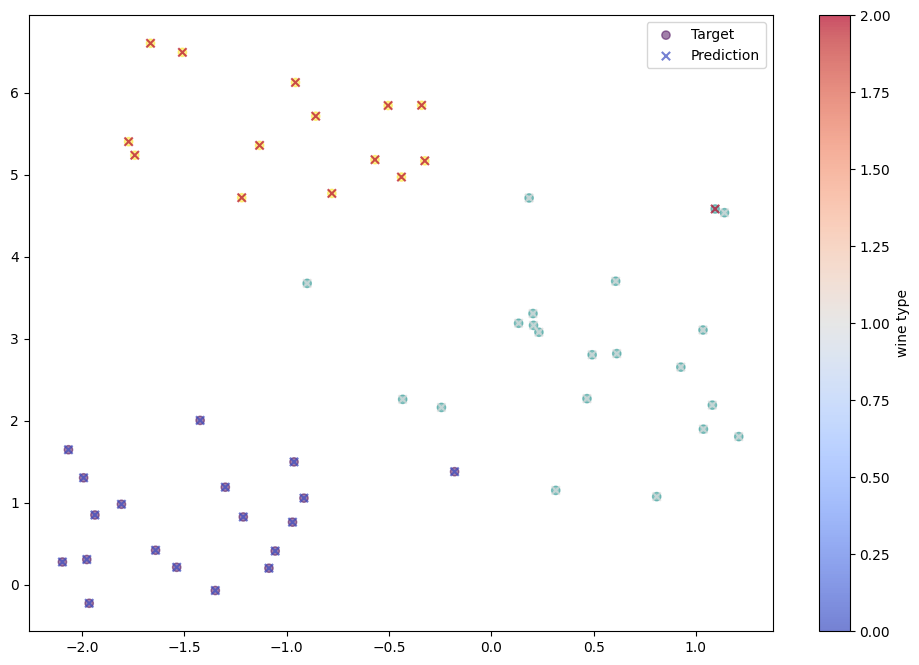

In [10]:
# 测试结果并绘图评估
targets = Y_test.cpu().numpy()
with torch.no_grad():
    outputs = net(X_test)
    _, predictions = torch.max(outputs.data, 1)
    predictions = predictions.cpu().numpy()
r2 = r2_score(predictions, targets)
print(f'测试集上的r2 score结果: {r2:.4f}')

# 绘图，使用 t-SNE 进行降维，绘制成2d
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test.cpu().numpy())
plt.figure(figsize=(12, 8))

# 绘制实际标签
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=targets, cmap='viridis', marker='o', alpha=0.5, label='Target')

# 绘制预测标签
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=predictions, cmap='coolwarm', marker='x', alpha=0.7, label='Prediction')

# 添加图例
plt.legend()
plt.colorbar(label='wine type')
plt.show()